In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

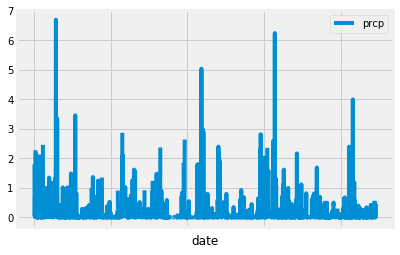

In [34]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

#session.query("select * from measurement").all()

#results = session.query(Measurement).all() - we couldn't figure this out so we cheated here. 

prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
results = pd.DataFrame(results)


# Calculate the date 1 year ago from the last data point in the database



# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date


results = results.set_index("date").sort_values("date", ascending = True)
results.head()



# Use Pandas Plotting with Matplotlib to plot the data
#results.reset_index().plot.scatter("date", "prcp")
#results["Date_Format"] = pd.to_datetime(results.index, format='%Y-%m-%d')
#type(results["Date_Format"].iloc[0])
results.plot()
#results.plot(x_compat=True) 
#results.plot.scatter("Date_Format", "prcp")
#results.head()


![precipitation](Images/precipitation.png)

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
results.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [15]:
# Design a query to show how many stations are available in this dataset?

#results = session.query(Station.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
len(session.query(Station.id).all())

9

In [36]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
df = session.query(Measurement.station, func.count(Measurement.station).label("Total")).group_by(Measurement.station).order_by("Total DESC").all()
df = pd.DataFrame(df)

print(df["Total"].sum())
df

#(select station, count(station) as total from measurement group by station) order by total desc

#session.query(Table.column, func.count(Table.column)).group_by(Table.column).all()

19550


C:\ProgramData\Anaconda3\lib\site-packages\sqlalchemy\sql\compiler.py:643: SAWarning: Can't resolve label reference 'Total DESC'; converting to text() (this warning may be suppressed after 10 occurrences)
  util.ellipses_string(element.element))


,station,Total
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [64]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station? #.query sort.  doing want to take the temp colum (measurement. and then autocomplete to see if temp file)

frequentstationfacts = session.query(Measurement.station, func.min(Measurement.tobs).label("Minimum"), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()

#in_temp_max = session.query(Measurement.station, func.max(Measurement.tobs)).all()
#min_temp_mean = session.query(Measurement.station, func.average(Measurement.tobs)).all()

print(frequentstationfacts[0])

station, mintmp, maxtmp, meantmp = frequentstationfacts[0]
print(station)
print(mintmp)
print(maxtmp)
print(meantmp)

print("Minumum temp: %d" % mintmp)

#min_temp_max




#select station,min(tobs) from measurement 



('USC00519281', 54.0, 85.0, 71.66378066378067)
USC00519281
54.0
85.0
71.66378066378067
Minumum temp: 54


C:\ProgramData\Anaconda3\lib\site-packages\sqlalchemy\sql\compiler.py:643: SAWarning: Can't resolve label reference 'countoftobs DESC'; converting to text() (this warning may be suppressed after 10 occurrences)
  util.ellipses_string(element.element))


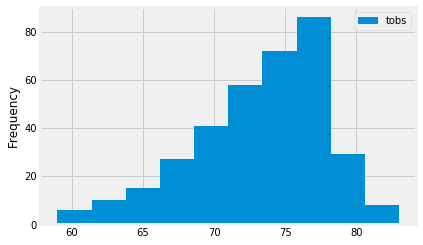

In [81]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#doing another .query but this time filter on a particular station as well as the last 12 months and then returning all of the temperature records

df2= session.query(func.count(Measurement.tobs).label("countoftobs"), Measurement.station).group_by(Measurement.station).order_by("countoftobs DESC").all()
df2
# select count(tobs), station from Measurements group by station

prev_year2 = dt.date(2017, 8, 23) - dt.timedelta(days=365)
results2 = session.query(Measurement.tobs).filter(Measurement.date >= prev_year2,Measurement.station == "USC00519281").all()
results2 = pd.DataFrame(results2)
results2.plot(kind = "hist")


In [19]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [91]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
mytrip = calc_temps("2017-01-01", "2017-01-15")

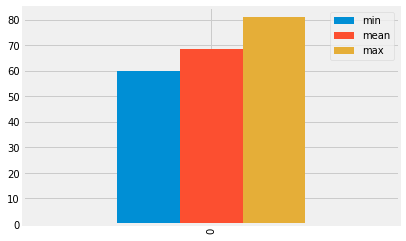

In [92]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
mytrip = pd.DataFrame(mytrip, columns = ["min", "mean", "max"])
mytrip.plot(kind = "bar")

In [112]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

mytripbs = session.query(Measurement.station, func.sum(Measurement.prcp).label("rainfall")).group_by(Measurement.station).order_by("rainfall DESC").all()
mytripbs = pd.DataFrame(mytripbs)

stationinfo = session.query(Station.latitude, Station.longitude, Station.elevation, Station.station, Station.name).all()
stationinfo = pd.DataFrame(stationinfo)

mytripbs.merge(stationinfo, how="left", on="station")



#Measurement.date,

#select date from measurement 
#select latitude, longtigude, elevation from Station


C:\ProgramData\Anaconda3\lib\site-packages\sqlalchemy\sql\compiler.py:643: SAWarning: Can't resolve label reference 'rainfall DESC'; converting to text() (this warning may be suppressed after 10 occurrences)
  util.ellipses_string(element.element))


,station,rainfall,latitude,longitude,elevation,name
0,USC00516128,1068.09,21.33310,-157.80250,152.4,"MANOA LYON ARBO 785.2, HI US"
1,USC00519281,588.64,21.45167,-157.84889,32.9,"WAIHEE 837.5, HI US"
2,USC00513117,382.62,21.42340,-157.80150,14.6,"KANEOHE 838.1, HI US"
3,USC00519523,295.68,21.33556,-157.71139,19.5,"WAIMANALO EXPERIMENTAL FARM, HI US"
4,USC00514830,234.49,21.52130,-157.83740,7.0,"KUALOA RANCH HEADQUARTERS 886.9, HI US"
5,USC00519397,131.62,21.27160,-157.81680,3.0,"WAIKIKI 717.2, HI US"
6,USC00511918,92.68,21.31520,-157.99920,0.9,"HONOLULU OBSERVATORY 702.2, HI US"
7,USC00518838,70.87,21.49920,-158.01110,306.6,"UPPER WAHIAWA 874.3, HI US"
8,USC00517948,43.44,21.39340,-157.97510,11.9,"PEARL CITY, HI US"


## Optional Challenge Assignment

In [23]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [24]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [25]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [26]:
# Plot the daily normals as an area plot with `stacked=False`
